In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [2]:
# Carga desde un archivo .xlsx sin indice
Amsterdam  = pd.read_csv('Amsterdam.csv')
Amsterdam = Amsterdam.drop(columns = ["Unnamed: 0.1", "Unnamed: 0"])

In [4]:
# Verificamos información del dataframe
Amsterdam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  9659 non-null   object 
 1   name                                          9659 non-null   object 
 2   host_name                                     9659 non-null   object 
 3   host_since                                    9659 non-null   object 
 4   host_response_time                            9659 non-null   object 
 5   host_response_rate                            9659 non-null   object 
 6   host_acceptance_rate                          9659 non-null   object 
 7   host_is_superhost                             9659 non-null   object 
 8   host_identity_verified                        9659 non-null   object 
 9   neighbourhood                                 9659 non-null   o

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS 

In [5]:
#Calculamos el numero total de la población "n"

Amsterdam['maximum_nights_avg_ntm'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9659 entries, 0 to 9658
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
9659 non-null   float64
dtypes: float64(1)
memory usage: 75.6 KB


In [6]:
# Obtenemos el limite superior y el límite inferios de la columna objetivo
Max = Amsterdam['maximum_nights_avg_ntm'].max()
Min = Amsterdam['maximum_nights_avg_ntm'].min()
Limites = [Min, Max]
Limites

[1.0, 1125.0]

In [7]:
# Calculamos el rango R
R = Max - Min
R

1124.0

In [8]:
# Calculamos el número de intervalos de clase "ni", aplicando la regla de Sturges
n = 9659

ni = 1 + 3.32 * np.log10(n)
ni

14.229974791343807

In [9]:
# Calculamos el ancho del intervalo "i"
i = R / ni
i

78.98819333704913

CREACIÓN DE CATEGORÍAS A PARTIR DE CLASES

In [10]:
# Categorización de variables
intervalos = np.linspace (1, 1125, 15)
intervalos

array([1.00000000e+00, 8.12857143e+01, 1.61571429e+02, 2.41857143e+02,
       3.22142857e+02, 4.02428571e+02, 4.82714286e+02, 5.63000000e+02,
       6.43285714e+02, 7.23571429e+02, 8.03857143e+02, 8.84142857e+02,
       9.64428571e+02, 1.04471429e+03, 1.12500000e+03])

In [11]:
# Creamos las categorías
categorias = [ "Categoria1", "Categoria2", "Categoria3", "Categoria4", "Categoria5", "Categoria6", "Categoria7", "Categoria8", "Categoria9", "Categoria10", "Categoria11", "Categoria12", "Categoria13", "Categoria14" ]

In [12]:
# Creamos las ctegorias en la columna numerica
Amsterdam['maximum_nights_avg_ntm'] = pd.cut ( x = Amsterdam ['maximum_nights_avg_ntm'], bins = intervalos, labels = categorias )
Amsterdam['maximum_nights_avg_ntm']

0       Categoria14
1       Categoria14
2       Categoria14
3        Categoria1
4       Categoria14
           ...     
9654     Categoria5
9655     Categoria1
9656    Categoria14
9657     Categoria5
9658     Categoria5
Name: maximum_nights_avg_ntm, Length: 9659, dtype: category
Categories (14, object): ['Categoria1' < 'Categoria2' < 'Categoria3' < 'Categoria4' ... 'Categoria11' < 'Categoria12' < 'Categoria13' < 'Categoria14']

In [13]:
table1 = freq_tbl(Amsterdam['maximum_nights_avg_ntm'])
table1

,maximum_nights_avg_ntm,frequency,percentage,cumulative_perc
0,Categoria1,4610,0.477275,0.478166
1,Categoria14,2488,0.257584,0.736231
2,Categoria5,1798,0.186148,0.922726
3,Categoria13,195,0.020188,0.942952
4,Categoria10,167,0.017290,0.960274
5,Categoria2,153,0.015840,0.976144
6,Categoria3,74,0.007661,0.983819
7,Categoria7,58,0.006005,0.989835
8,Categoria4,25,0.002588,0.992428
9,Categoria8,21,0.002174,0.994606


In [14]:
# Elimino las columnas "porcentage" y "cumulative_perc" para trabajar con las frecuencias

table2 = table1.drop(['percentage', 'cumulative_perc'], axis=1)
table2

,maximum_nights_avg_ntm,frequency
0,Categoria1,4610
1,Categoria14,2488
2,Categoria5,1798
3,Categoria13,195
4,Categoria10,167
5,Categoria2,153
6,Categoria3,74
7,Categoria7,58
8,Categoria4,25
9,Categoria8,21


In [15]:
# Ajusto el indice de mi data frame

Filtro_index = table2.set_index('maximum_nights_avg_ntm')
Filtro_index

,frequency
maximum_nights_avg_ntm,
Categoria1,4610
Categoria14,2488
Categoria5,1798
Categoria13,195
Categoria10,167
Categoria2,153
Categoria3,74
Categoria7,58
Categoria4,25


Text(0, 0.5, 'Frecuencia')

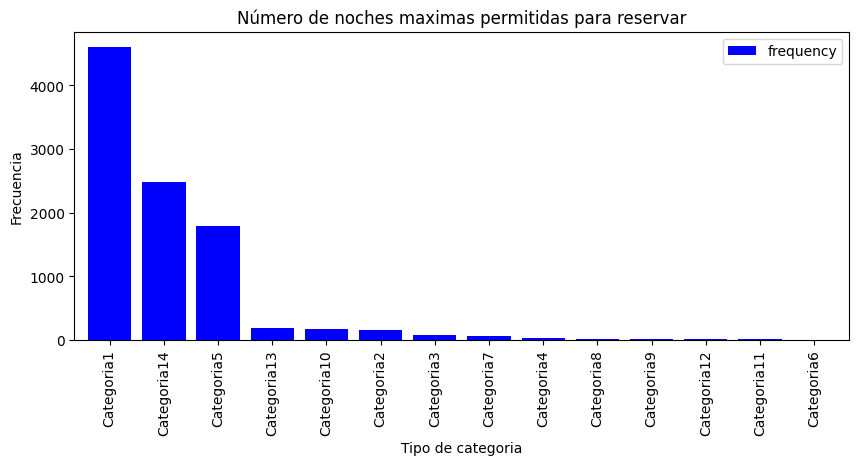

In [17]:
# Realizamos gráfico de barras del dataframe filtrado

Filtro_index.plot( kind = 'bar', width = 0.8, figsize = (10,4), color = "blue" )
plt.title('Número de noches maximas permitidas para reservar')
plt.xlabel('Tipo de categoria')
plt.ylabel('Frecuencia')